In [145]:
from __future__ import unicode_literals

import re
from collections import Counter
import arabic_reshaper
from bidi.algorithm import get_display
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

In [81]:
f = open("hespress.txt", "r", encoding='utf-8')
tokens = (f.read()).split()
f.close()

f = open("arabic_stopwords.txt", "r", encoding="utf-8")
stopwords = (f.read()).split()
f.close()

In [82]:
print(len(stopwords))
print(len(tokens))

813
2790303


In [83]:
%%time 
tokens = [token for token in tokens if token not in stopwords]
print(len(tokens))

1901493
Wall time: 21.9 s


In [158]:
%%time
for i in range(len(tokens)):
    if(tokens[i] in ["بالله", "والله", "تالله", "اللهم", "لله"]): tokens[i] = "الله"
    if(tokens[i] in ["المغربية", "المغربي", "المغاربة"]): tokens[i] = "المغرب"
    if(tokens[i] in ["مواطن"]): tokens[i] = "وطن"
    if(tokens[i] in ["رجال","رجلين"]): tokens[i] = "رجل"
    if(tokens[i] in ["دول", "دولي"]): tokens[i] = "دولة"
    if(tokens[i] != 'الله'): tokens[i] = re.sub('^ال','',tokens[i])

Wall time: 3.09 s


In [159]:
%%time
count = Counter(tokens)
print(type(count))

<class 'collections.Counter'>
Wall time: 369 ms


In [160]:
print(count.most_common(10))

[('الله', 23304), ('مغرب', 22943), ('دولة', 10270), ('شعب', 6163), ('وطن', 4582), ('حكومة', 3544), ('ناس', 3222), ('عالم', 3180), ('حق', 3037), ('تعليم', 2999)]


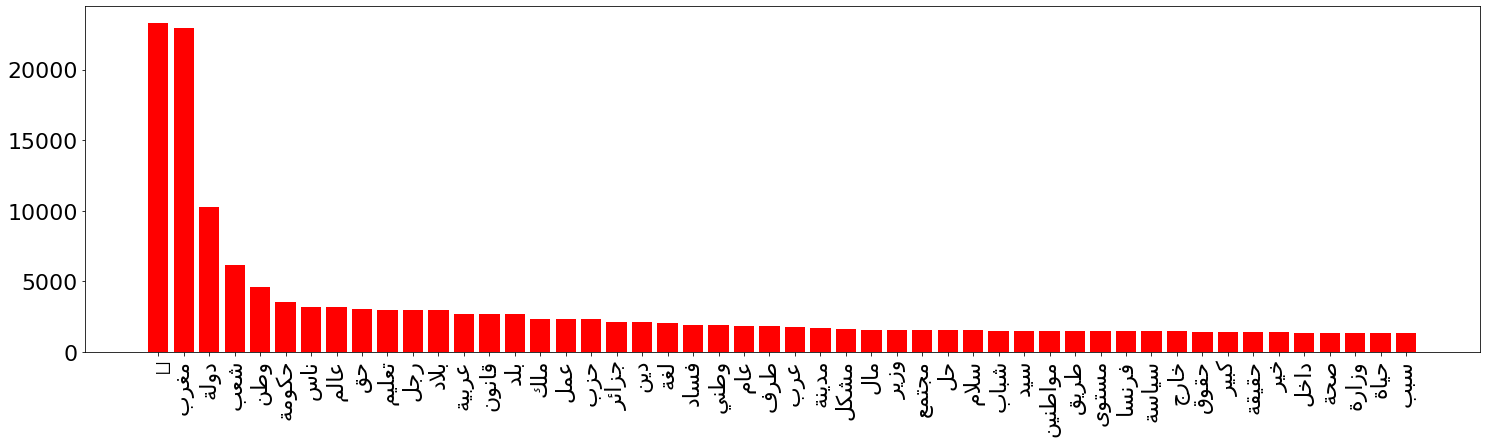

In [161]:
from random import shuffle


data = count.most_common(50)

words = []
frequency = []

for i in range(50):
    words.append(get_display(arabic_reshaper.reshape(data[i][0])))
    frequency.append(data[i][1])

plt.figure(figsize=(25,10))

plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.4)

plt.rcParams.update({'font.size': 22})
plt.bar(words, frequency, color='r')
plt.show()